## Premisa: descripción del problema
### Un banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

In [1]:
import pandas as pd 
import numpy as np 

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# escalado y modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, average_precision_score
)
from sklearn.feature_selection import f_classif, SelectKBest

In [2]:
archivo = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"
df1 = pd.read_csv(archivo, sep=";")


In [3]:
df1.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df1.shape


(41188, 21)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# control de duplicados
duplicados_todos = df1[df1.duplicated(keep=False)]
print(duplicados_todos)


       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married       

In [7]:
df= df1.drop_duplicates(keep=False)

In [8]:
# Valores nulos

df.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Tratamiento de Outliers

In [9]:
# outliers. Ver valores extremos
num_cols = [
    "age", "duration", "campaign", "pdays", "previous",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed"
]


outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Detectar outliers
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    outlier_pct = 100 * len(outliers) / len(df)
    
    outlier_summary.append({
        "Variable": col,
        "Outliers (%)": round(outlier_pct, 2),
        "Q1": round(Q1, 2),
        "Q3": round(Q3, 2),
        "IQR": round(IQR, 2)
    })
outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Outliers (%)", ascending=False)
display(outlier_df)

,Variable,Outliers (%),Q1,Q3,IQR
4,previous,13.66,0.00,0.00,0.00
1,duration,7.20,102.00,319.00,217.00
2,campaign,5.84,1.00,3.00,2.00
3,pdays,3.68,999.00,999.00,0.00
0,age,1.13,32.00,47.00,15.00
7,cons.conf.idx,1.08,-42.70,-36.40,6.30
5,emp.var.rate,0.00,-1.80,1.40,3.20
6,cons.price.idx,0.00,93.08,93.99,0.92
8,euribor3m,0.00,1.34,4.96,3.62
9,nr.employed,0.00,5099.10,5228.10,129.00


In [10]:
# Eliminación de outliers: "duration"
#"duration": un valor muy alto de duración de la llamada puede distorsionar el análisis
#"emp.var.rate"; tasa de variación de empleo

cols_to_clean = ["duration", "emp.var.rate"]

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

### Análisis univariante (por columna)
####    Análisis sobre variantes categóricas

In [11]:

df.job.value_counts()



job
admin.           9702
blue-collar      8563
technician       6266
services         3668
management       2702
retired          1595
entrepreneur     1345
self-employed    1302
housemaid         991
unemployed        954
student           803
unknown           310
Name: count, dtype: int64

In [12]:
df.marital.value_counts()

marital
married     23137
single      10693
divorced     4300
unknown        71
Name: count, dtype: int64

In [13]:
df.education.value_counts()

education
university.degree      11289
high.school             8809
basic.9y                5607
professional.course     4882
basic.4y                3885
basic.6y                2112
unknown                 1601
illiterate                16
Name: count, dtype: int64

In [14]:
df.default.value_counts()


default
no         30210
unknown     7988
yes            3
Name: count, dtype: int64

In [15]:
df.housing.value_counts()

housing
yes        20029
no         17248
unknown      924
Name: count, dtype: int64

In [16]:
df.loan.value_counts()


loan
no         31494
yes         5783
unknown      924
Name: count, dtype: int64

In [17]:
df.month.value_counts()


month
may    12814
jul     6525
aug     5818
jun     4976
nov     3810
apr     2399
oct      659
mar      524
sep      515
dec      161
Name: count, dtype: int64

In [18]:
df.day_of_week.value_counts()


day_of_week
mon    7988
thu    7932
tue    7523
wed    7504
fri    7254
Name: count, dtype: int64

In [19]:
df.poutcome.value_counts()


poutcome
nonexistent    32958
failure         3995
success         1248
Name: count, dtype: int64

In [20]:
df.y.value_counts()

y
no     35089
yes     3112
Name: count, dtype: int64

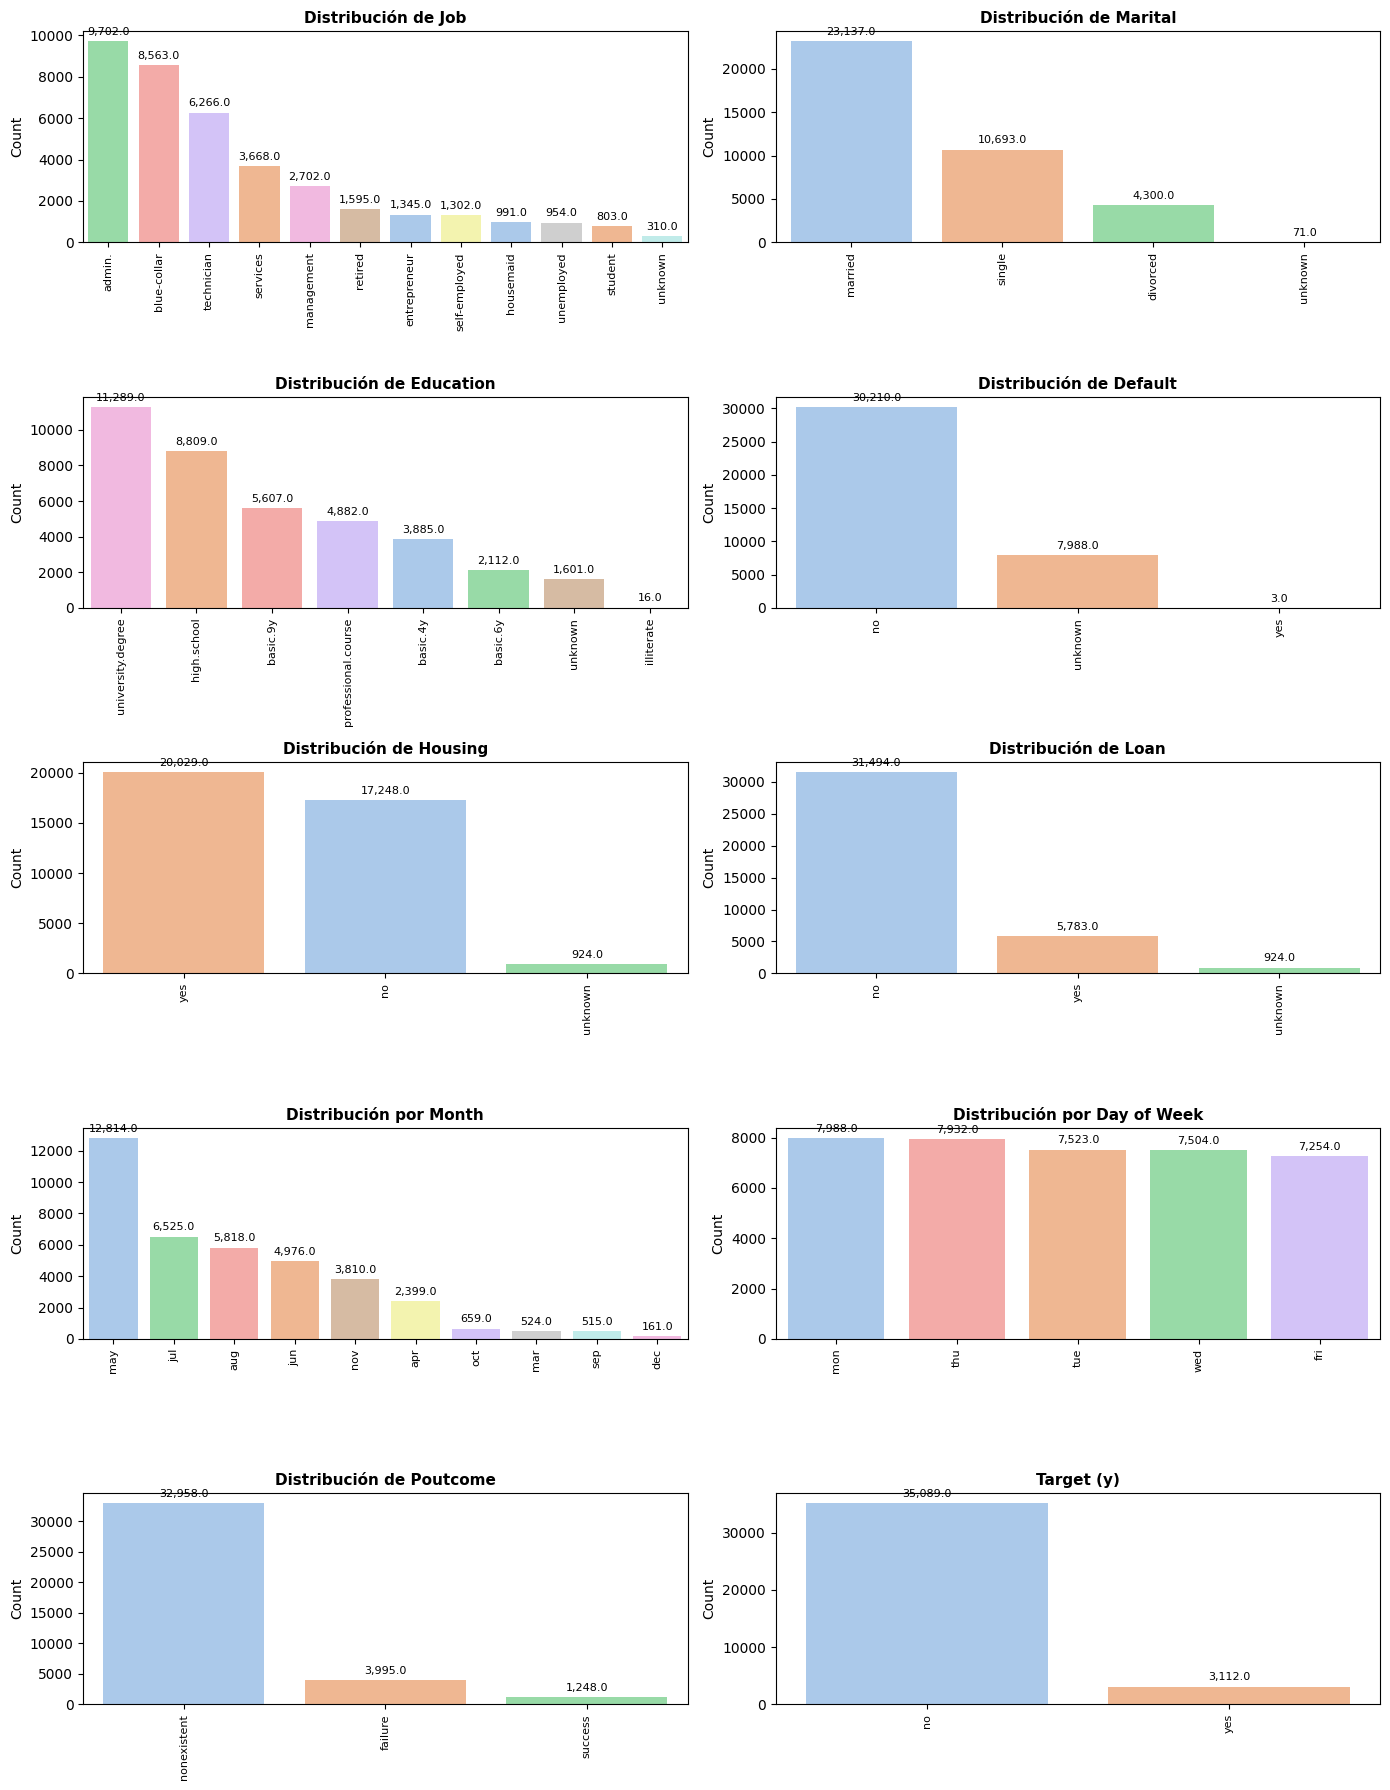

In [21]:
def draw_count(ax, data, col, title):
    # Ordenar categorías por frecuencia (desc)
    order = data[col].value_counts(dropna=False).index

    g = sns.countplot(
        ax=ax,
        data=data,
        x=col,
        hue=col,
        order=order,
        palette="pastel",
        legend=False
    )

    # Títulos y ejes
    ax.set_title(title, fontsize=11, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")

    # Rotación y tamaño de etiquetas
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)

    # Añadir valores encima de las barras
    for p in g.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(
                f"{h:,}",
                (p.get_x() + p.get_width() / 2, h),
                ha="center",
                va="bottom",
                fontsize=8,
                xytext=(0, 3),
                textcoords="offset points"
            )

# --- Layout general ---
fig, axis = plt.subplots(5, 2, figsize=(14, 18))

draw_count(axis[0, 0], df, "job",          "Distribución de Job")
draw_count(axis[0, 1], df, "marital",      "Distribución de Marital")
draw_count(axis[1, 0], df, "education",    "Distribución de Education")
draw_count(axis[1, 1], df, "default",      "Distribución de Default")
draw_count(axis[2, 0], df, "housing",      "Distribución de Housing")
draw_count(axis[2, 1], df, "loan",         "Distribución de Loan")
draw_count(axis[3, 0], df, "month",        "Distribución por Month")
draw_count(axis[3, 1], df, "day_of_week",  "Distribución por Day of Week")
draw_count(axis[4, 0], df, "poutcome",     "Distribución de Poutcome")
draw_count(axis[4, 1], df, "y",            "Target (y)")

plt.tight_layout()
plt.show()


### Distribución de variables categóricas
1. Job

Los grupos más numerosos son blue-collar, management y technician.

Profesiones como student, unemployed o housemaid tienen baja representación.

Conclusión: predominio de trabajadores técnicos y administrativos.

2. Marital

Predominan los clientes casados, seguidos por solteros.

El grupo de divorciados es minoritario.

Conclusión: el perfil típico del cliente es una persona casada.

3. Education

Las categorías más frecuentes son university degree y high school.

Illiterate es casi inexistente.

Conclusión: el dataset se compone principalmente de personas con educación media o superior.

4. Default

La gran mayoría no tiene deudas impagas (no).

Indica un bajo nivel de morosidad entre los clientes.

Conclusión: buena salud crediticia general.

5. Housing

Una gran parte de los clientes posee crédito hipotecario.

Un porcentaje relevante no lo tiene.

Conclusión: el crédito de vivienda es un producto común.

6. Loan

La mayoría no tiene préstamos personales.

Existe una minoría con crédito activo.

Conclusión: el crédito personal no es tan habitual como el hipotecario.

7. Month

Mayor volumen de campañas en may, jul y aug.

Conclusión: las campañas de marketing se intensifican a mitad de año.

8. Day_of_week

Distribución relativamente uniforme entre los días laborales.

Ligero aumento de actividad entre martes y jueves.

Conclusión: no existe un sesgo fuerte por día.

9. Poutcome

La mayoría no participó en campañas anteriores (nonexistent).

Entre quienes sí, predominan los resultados failure.

Conclusión: bajo historial de éxito en campañas previas.

10. Target (y)

El valor “no” (no contrató el producto) domina ampliamente.

Conclusión: existe un desbalance de clases significativo que debe considerarse en la fase de modelado.

### Análisis sobre variables numéricas y multivariantes (combinados). Detección de outliers

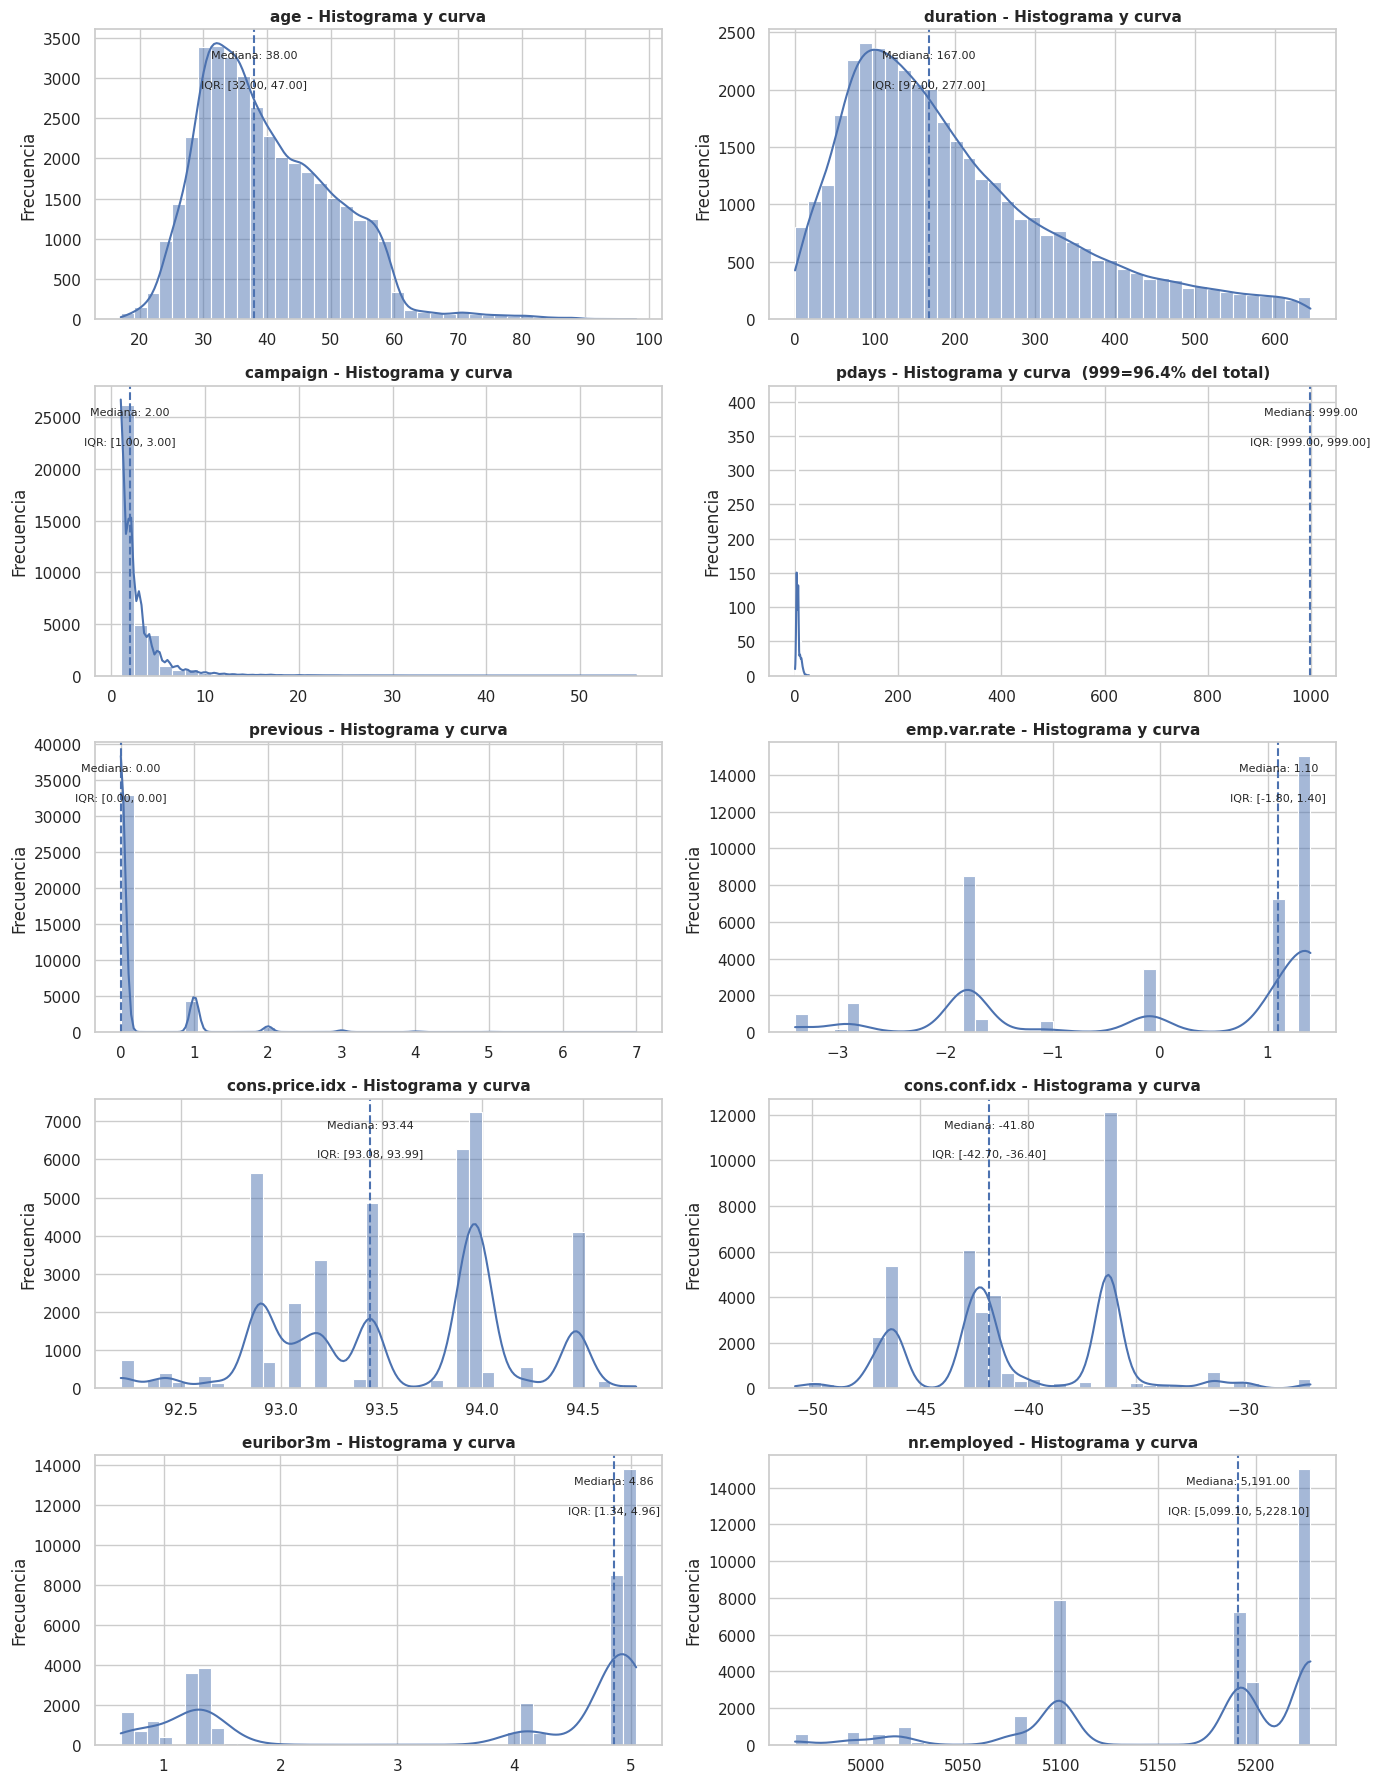

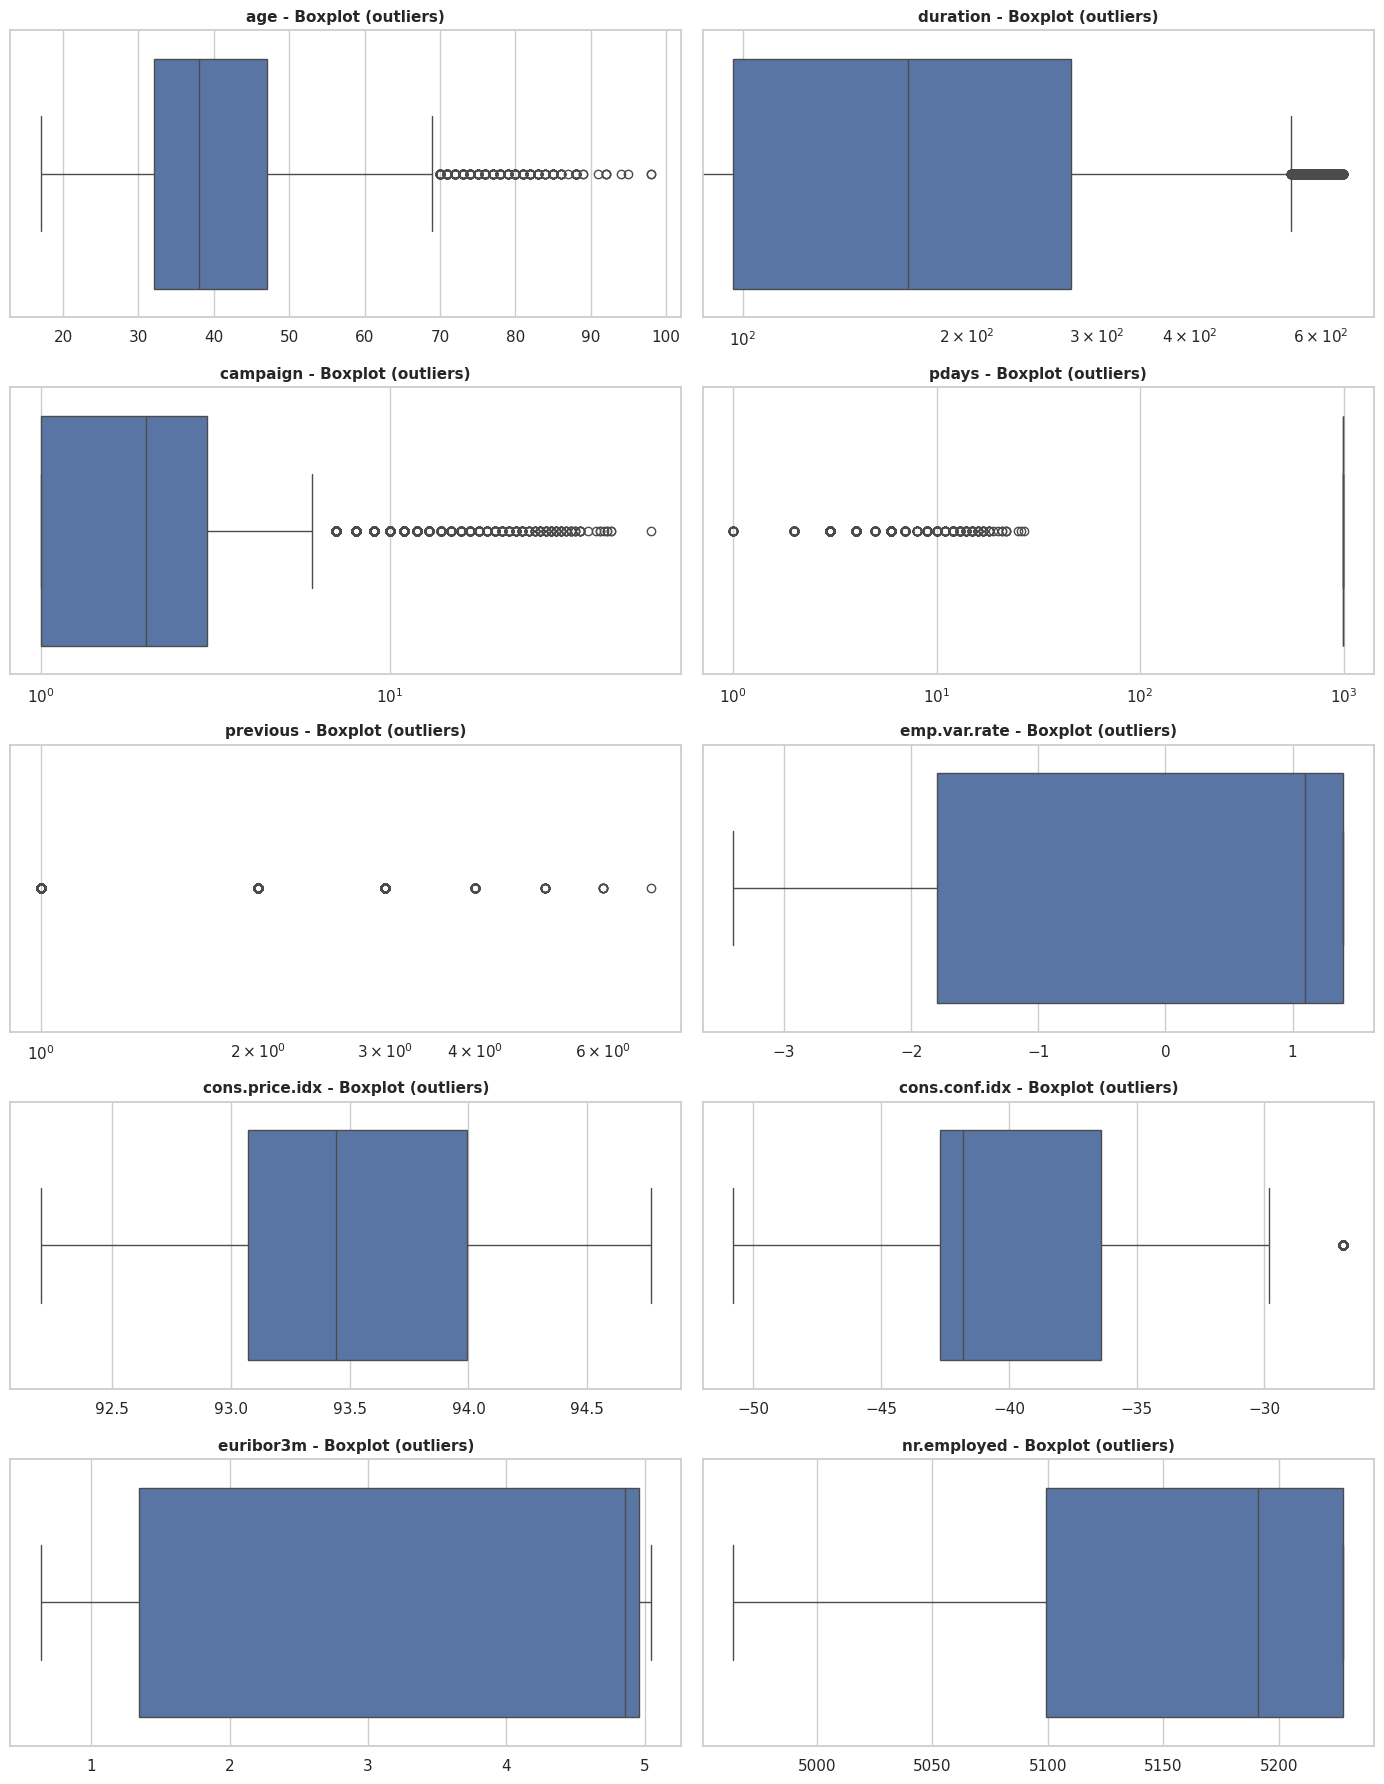

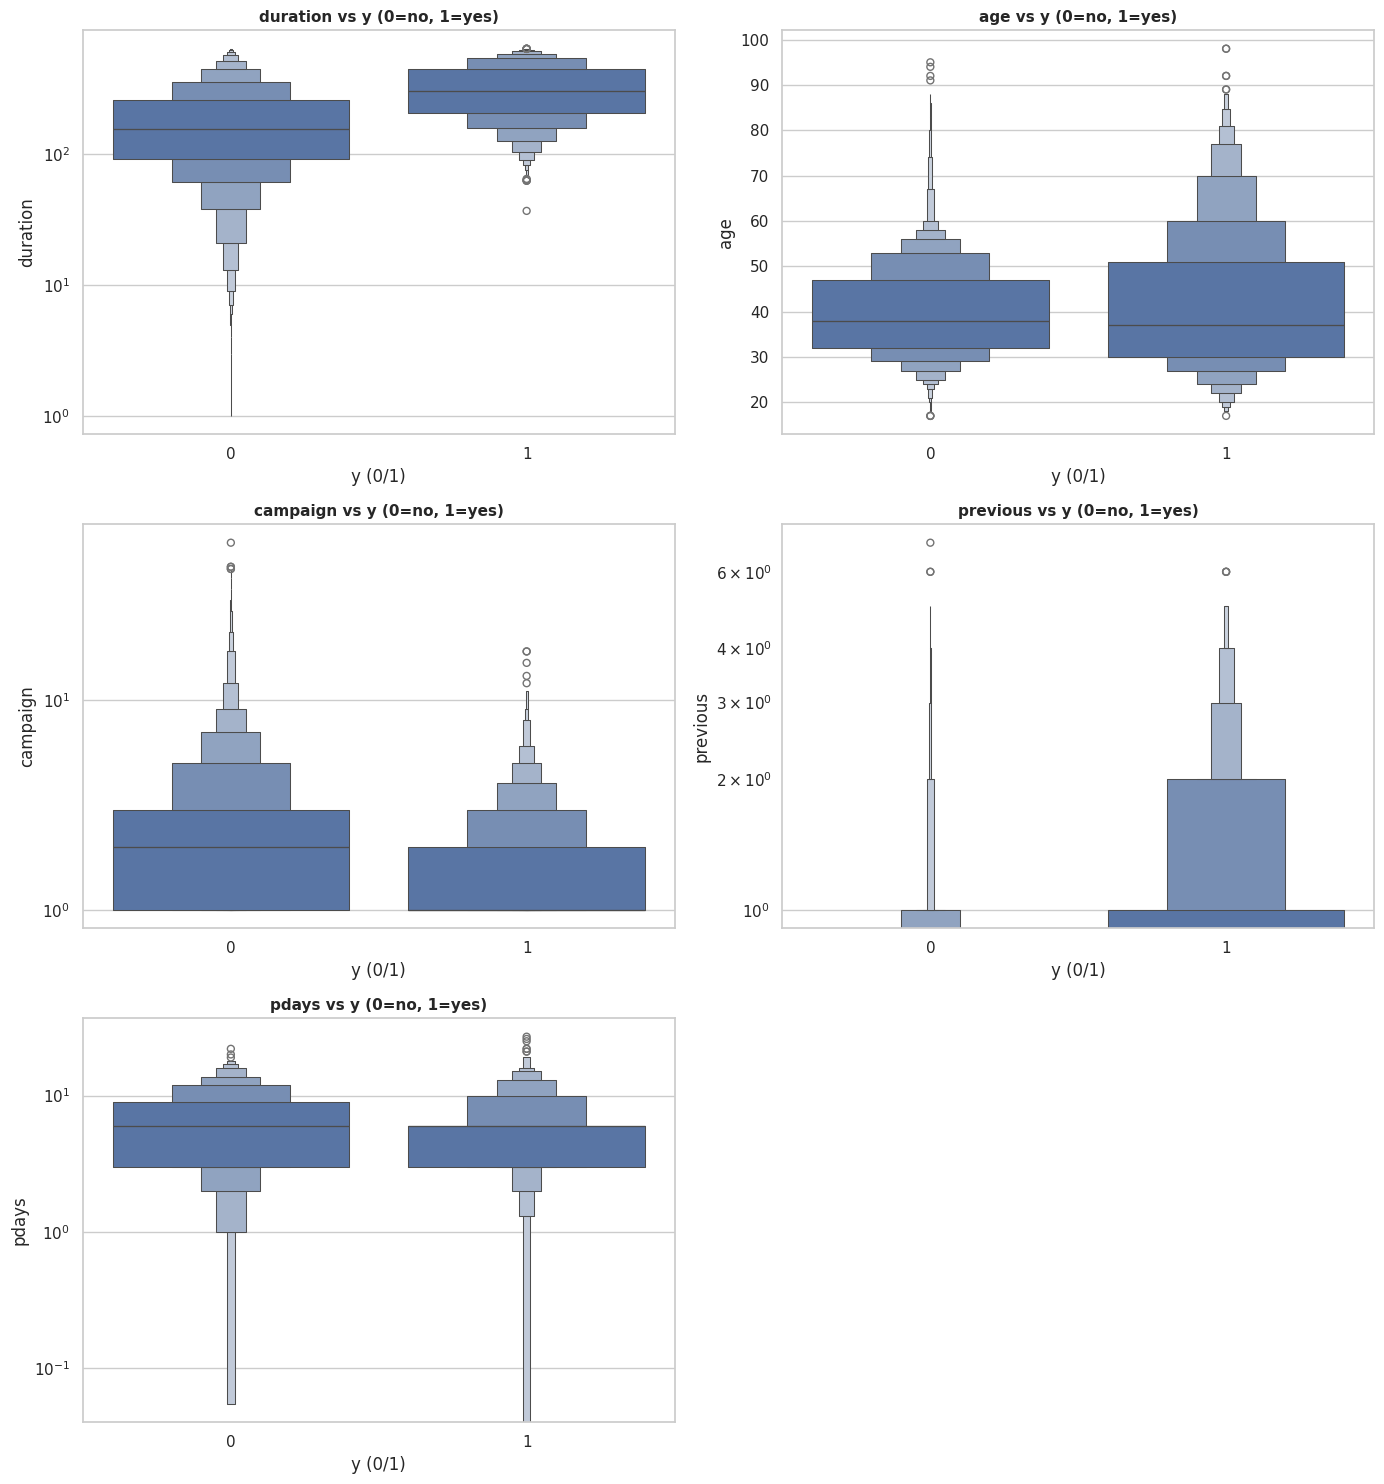

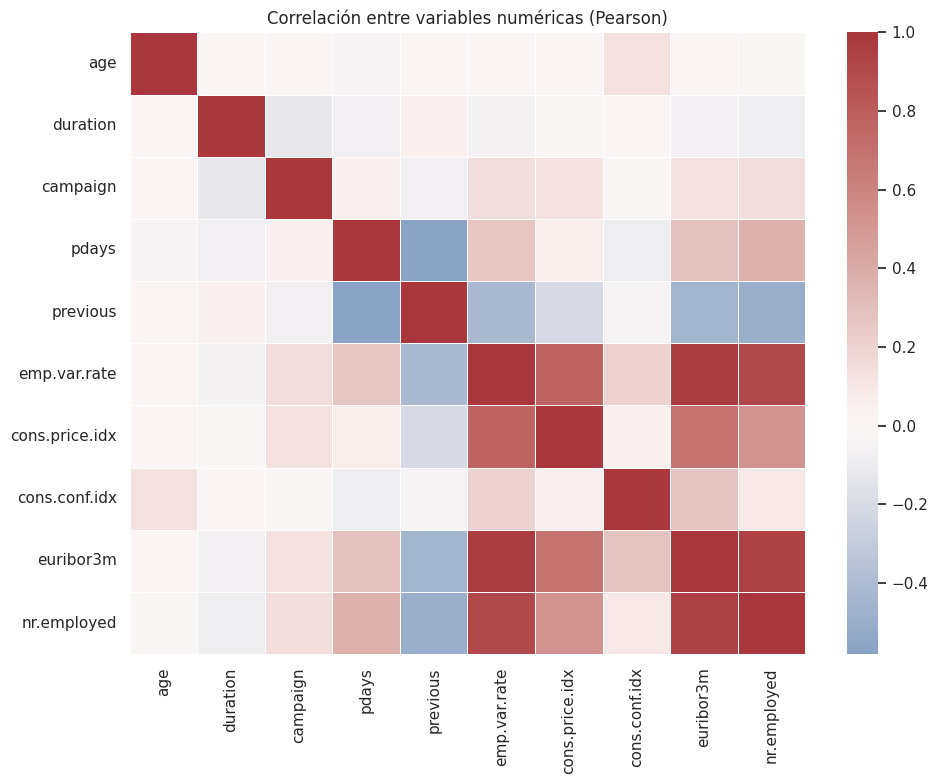

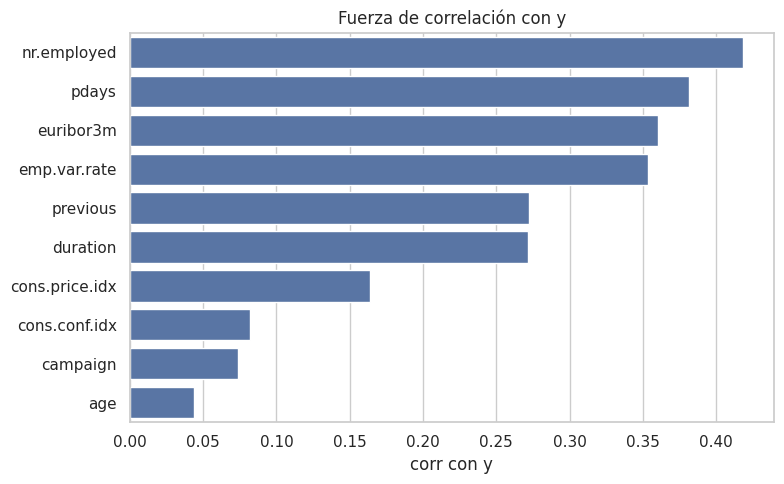

Correlación con y (signed):


previous          0.272341
duration          0.271779
cons.conf.idx     0.081688
age               0.043447
campaign         -0.073767
cons.price.idx   -0.163682
emp.var.rate     -0.353303
euribor3m        -0.360133
pdays            -0.381080
nr.employed      -0.418457
Name: _y_bin, dtype: float64

In [22]:
# Configuración
sns.set_theme(context="notebook", style="whitegrid")

# Target binaria (0/1) para correlaciones y plots condicionales
if "y" in df.columns:
    df["_y_bin"] = (df["y"].astype(str).str.lower() == "yes").astype(int)
else:
    df["_y_bin"] = np.nan  # por si no existe

# Histograma
rows = 5
cols = 2
fig, axis = plt.subplots(rows, cols, figsize=(14, 18))
axis = axis.flatten()

for i, col in enumerate(num_cols[:rows*cols]):
    ax = axis[i]
    s = df[col].dropna()

    # Caso especial pdays: separar valor 999 (no contactado)
    if col == "pdays":
        mask_999 = s == 999
        s_plot = s[~mask_999]
        sns.histplot(s_plot, bins=40, kde=True, ax=ax) #añado kde (Kernel Density Estimation) para trazar una curva suavizada en el histograma
        share_999 = mask_999.mean()
        ax.set_title(f"{col} - Histograma y curva  (999={share_999:.1%} del total)", fontsize=11, fontweight="bold")
    else:
        sns.histplot(s, bins=40, kde=True, ax=ax)
        ax.set_title(f"{col} - Histograma y curva", fontsize=11, fontweight="bold")

    # Anotar mediana y IQR (rango intercuartílico)
    if len(s) > 0:
        q1, med, q3 = np.nanpercentile(s, [25, 50, 75])
        ax.axvline(med, linestyle="--")
        ax.annotate(f"Mediana: {med:,.2f}", xy=(med, ax.get_ylim()[1]*0.9), xytext=(0, 0),
                    textcoords="offset points", ha="center", fontsize=8)
        ax.annotate(f"IQR: [{q1:,.2f}, {q3:,.2f}]", xy=(med, ax.get_ylim()[1]*0.8),
                    ha="center", fontsize=8)
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")
for j in range(i+1, rows*cols):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()

# Outliers
fig, axis = plt.subplots(rows, cols, figsize=(14, 18))
axis = axis.flatten()

for i, col in enumerate(num_cols[:rows*cols]):
    ax = axis[i]
    s = df[col].dropna()

    # Boxplot simple
    sns.boxplot(x=s, ax=ax)
    ax.set_title(f"{col} - Boxplot (outliers)", fontsize=11, fontweight="bold")
    if col in ["duration", "campaign", "previous", "pdays"]:
        ax.set_xscale("log") # no hago uso linear debido al tamaño de la cola
    ax.set_xlabel("")
for j in range(i+1, rows*cols):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()

# Boxenplot. Relación con la variable objetivo (y)

if "_y_bin" in df.columns and df["_y_bin"].notna().any():
    cols_vs_y = [c for c in ["duration", "age", "campaign", "previous", "pdays"] if c in df.columns]

    n = len(cols_vs_y)
    r = int(np.ceil(n / 2))
    c = 2 if n > 1 else 1
    fig, axis = plt.subplots(r, c, figsize=(14, 5*r))
    axis = np.array(axis).reshape(-1)  # aplanar

    for i, col in enumerate(cols_vs_y):
        ax = axis[i]
        data_plot = df[[col, "_y_bin"]].copy()
        if col == "pdays":
            data_plot = data_plot[data_plot[col] != 999]  # excluimos 999 aquí para no distorsionar

        # Boxenplot (alternativa a violinplot para marcar mejor los rangos)
        sns.boxenplot(
            data=data_plot,
            x="_y_bin",
            y=col,
            ax=ax
        )
        ax.set_title(f"{col} vs y (0=no, 1=yes)", fontsize=11, fontweight="bold")
        ax.set_xlabel("y (0/1)")
        ax.set_ylabel(col)
        if col in ["duration", "campaign", "previous", "pdays"]:
            ax.set_yscale("log")  # igual que antes, cambio a log en lugar de linear para representar mejor la cola larga.

    # eliminar ejes vacíos si sobran
    for j in range(i+1, len(axis)):
        fig.delaxes(axis[j])

    plt.tight_layout()
    plt.show()

# Ver correlaciones. Heatmap

corr_num = df[num_cols].corr(method="pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_num, annot=False, cmap="vlag", center=0, linewidths=0.5)
plt.title("Correlación entre variables numéricas (Pearson)")
plt.tight_layout()
plt.show()

# Correlación con y
if df["_y_bin"].notna().any():
    corr_y = df[num_cols + ["_y_bin"]].corr(method="pearson")["_y_bin"].drop("_y_bin")
    corr_y_abs = corr_y.abs().sort_values(ascending=False)

    # Barras de correlación con y
    plt.figure(figsize=(8, 5))
    sns.barplot(x=corr_y_abs.values, y=corr_y_abs.index)
    plt.title("Fuerza de correlación con y")
    plt.xlabel("corr con y")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # imprimir tabla ordenada
    print("Correlación con y (signed):")
    display(corr_y.sort_values(ascending=False))


## Distribución de variables numéricas
1. Age

Rango aproximado entre 18 y 95 años (amplio espectro), con concentración principal entre 30 y 50 años.

La distribución muestra una ligera asimetría hacia edades más altas.

Conclusión: el público objetivo son adultos en edad laboral activa.

2. Duration

Representa la duración de la última llamada (en segundos).

La mayoría de las llamadas son cortas, concentradas en menos de 300 segundos (5 minutos).

Algunas observaciones extremas superan los 1.000 segundos.

Conclusión: el tiempo de conversación es breve en general, aunque existen contactos muy prolongados que podrían asociarse a conversiones positivas.

3. Campaign

Indica el número de contactos realizados durante la campaña actual.

La mayoría de los clientes fue contactada una o dos veces.

Existen casos aislados con más de 20 contactos.

Conclusión: la estrategia de marketing se basa en pocos intentos por cliente.

4. Pdays

Días transcurridos desde el último contacto en una campaña anterior.

La mayoría tiene valor 999, lo que puede indicar no haber sido contactado previamente.

Conclusión: la gran parte de los clientes son nuevos en la base de contacto.

5. Previous

Número de contactos realizados en campañas anteriores.

La mayoría de registros muestra 0 contactos previos.

Conclusión: confirma que el dataset se compone principalmente de primeros contactos.

6. Emp.var.rate

Tasa de variación del empleo (indicador trimestral macroeconómico).

Valores cercanos a 0 son los más comunes, aunque se observan periodos negativos (crisis) y positivos (expansión).

Conclusión: la base cubre diferentes etapas del ciclo económico.

7. Cons.price.idx

Índice de precios al consumo (IPC).

Rango estrecho entre 92 y 95, con leves variaciones según el periodo.

Conclusión: entorno económico estable durante la campaña.

8. Cons.conf.idx

Índice de confianza del consumidor.

Valores negativos (entre -50 y -25). Puede indicar que el consumidor no es optimista

Conclusión: las campañas se realizaron en un contexto de baja confianza del consumidor.

9. Euribor3m

Tasa de interés interbancaria a 3 meses.

Oscila entre 0.6 y 5.0, mostrando descensos hacia los últimos periodos.

Conclusión: refleja la tendencia de tipos de interés en el mercado financiero.

10. Nr.employed

Este es un indicador macroeconómico que muestr el número de empleados promedio (parece parte de un rango o clasificación).

Valores concentrados en torno a 5000, con pequeñas variaciones.

Conclusión: entorno laboral estable con escasas fluctuaciones durante el periodo analizado.

## Codificación y escalado:
| Variable | Descripción                     | Tipo    |
| -------- | ------------------------------- | ------- |
| **y**    | Resultado de la campaña (sí/no) | Binaria |



### Codificación de variables codificables (categóricas)
 Usar One-Hot Encoding

In [23]:
# Variable objetivo (y)
y = df["y"].apply(lambda x: 1 if str(x).lower() == "yes" else 0)

# Variables predictoras
X = df[[
    "age", "job", "marital", "education", "default",
    "housing", "loan", "contact", "month", "day_of_week",
    "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed"
]]  #excluyo "y" al ser variable objetivo y "duration" ya que no conozco el dato previo a la campaña.
 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35537,30,technician,single,university.degree,no,no,no,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
18404,56,technician,divorced,university.degree,unknown,no,no,cellular,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
6552,34,services,married,high.school,no,no,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
27516,46,technician,married,professional.course,no,no,no,cellular,nov,fri,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
22523,29,technician,single,high.school,no,yes,no,cellular,aug,fri,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


In [25]:
X_train.shape

(30560, 19)

In [26]:
X_test.shape

(7641, 19)

In [27]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
18676,53,admin.,married,high.school,unknown,no,no,cellular,jul,thu,8,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
26229,32,entrepreneur,single,university.degree,no,no,no,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
1923,29,admin.,married,high.school,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
39539,28,admin.,single,unknown,no,yes,no,cellular,apr,wed,2,6,4,success,-1.8,93.749,-34.6,0.654,5008.7
332,35,management,married,high.school,no,yes,no,telephone,may,mon,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20315,31,management,married,university.degree,no,no,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
18474,47,blue-collar,married,basic.4y,no,unknown,unknown,telephone,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
3993,50,services,married,basic.6y,no,yes,no,telephone,may,mon,4,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0
14912,55,housemaid,married,basic.4y,no,no,no,cellular,jul,wed,7,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1


In [28]:
y_test

18676    0
26229    0
1923     0
39539    1
332      0
        ..
20315    0
18474    0
3993     0
14912    0
36485    1
Name: y, Length: 7641, dtype: int64

In [29]:
cat_variables = ["job", "marital", "education", "default","housing", "loan", "month", "day_of_week",
    "poutcome"]

In [30]:
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# instancio el encoder
label_encoder_job = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_default = LabelEncoder()
label_encoder_housing = LabelEncoder()
label_encoder_loan = LabelEncoder()
label_encoder_month = LabelEncoder()
label_encoder_day_of_week = LabelEncoder()
label_encoder_poutcome = LabelEncoder()


# entreno el encoder con los datos de entrenamiento
label_encoder_job.fit(X_train['job'])
label_encoder_marital.fit(X_train['marital'])
label_encoder_education.fit(X_train['education'])
label_encoder_default.fit(X_train['default'])
label_encoder_housing.fit(X_train['housing'])
label_encoder_loan.fit(X_train['loan'])
label_encoder_month.fit(X_train['month'])
label_encoder_day_of_week.fit(X_train['day_of_week'])
label_encoder_poutcome.fit(X_train['poutcome'])

# aplico el encoder
X_train_cat_le['job'] = label_encoder_job.transform(X_train['job'])
X_train_cat_le['marital'] = label_encoder_marital.transform(X_train['marital'])
X_train_cat_le['education'] = label_encoder_education.transform(X_train['education'])
X_train_cat_le['default'] = label_encoder_default.transform(X_train['default'])
X_train_cat_le['housing'] = label_encoder_housing.transform(X_train['housing'])
X_train_cat_le['loan'] = label_encoder_loan.transform(X_train['loan'])
X_train_cat_le['month'] = label_encoder_month.transform(X_train['month'])
X_train_cat_le['day_of_week'] = label_encoder_day_of_week.transform(X_train['day_of_week'])
X_train_cat_le['poutcome'] = label_encoder_poutcome.transform(X_train['poutcome'])

X_test_cat_le['job'] = label_encoder_job.transform(X_test['job'])
X_test_cat_le['marital'] = label_encoder_marital.transform(X_test['marital'])
X_test_cat_le['education'] = label_encoder_education.transform(X_test['education'])
X_test_cat_le['default'] = label_encoder_default.transform(X_test['default'])
X_test_cat_le['housing'] = label_encoder_housing.transform(X_test['housing'])
X_test_cat_le['loan'] = label_encoder_loan.transform(X_test['loan'])
X_test_cat_le['month'] = label_encoder_month.transform(X_test['month'])
X_test_cat_le['day_of_week'] = label_encoder_day_of_week.transform(X_test['day_of_week'])
X_test_cat_le['poutcome'] = label_encoder_poutcome.transform(X_test['poutcome'])


X_train_cat_le.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35537,30,9,2,6,0,0,0,cellular,6,1,1,999,0,1,-1.8,92.893,-46.2,1.244,5099.1
18404,56,9,0,6,1,0,0,cellular,3,2,3,999,0,1,1.4,93.918,-42.7,4.968,5228.1
6552,34,7,1,3,0,0,0,telephone,6,4,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
27516,46,9,1,5,0,0,0,cellular,7,0,2,999,0,1,-0.1,93.200,-42.0,4.021,5195.8
22523,29,9,2,3,0,2,0,cellular,1,0,3,999,0,1,1.4,93.444,-36.1,4.964,5228.1


In [31]:
# One-Hot Encoding: asignar un valore entero único a cada categoría

# instancio el encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(X_train[cat_variables])

# aplico el encoder en amhos
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index = X_train.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index = X_test.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
35537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
27516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Cofidicación de variables escalables (numéricas)
 Usar Standarscaler

In [32]:
num_variables = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [33]:
# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35537,-0.963838,-0.564177,0.194412,-0.351667,-1.196169,-1.173169,-1.234088,-1.371418,-0.944586
18404,1.533739,0.154328,0.194412,-0.351667,0.838372,0.592256,-0.478355,0.776091,0.845502
6552,-0.579595,-0.564177,0.194412,-0.351667,0.647634,0.723155,0.881963,0.712081,0.330678
27516,0.573132,-0.204925,0.194412,-0.351667,-0.115319,-0.644403,-0.327209,0.229987,0.397286
22523,-1.059898,0.154328,0.194412,-0.351667,0.838372,-0.224146,0.946740,0.773785,0.845502


In [34]:
# unificamos el dataset preprocesado hasta el momento
X_train_num_scal.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35537,-0.963838,-0.564177,0.194412,-0.351667,-1.196169,-1.173169,-1.234088,-1.371418,-0.944586
18404,1.533739,0.154328,0.194412,-0.351667,0.838372,0.592256,-0.478355,0.776091,0.845502
6552,-0.579595,-0.564177,0.194412,-0.351667,0.647634,0.723155,0.881963,0.712081,0.330678
27516,0.573132,-0.204925,0.194412,-0.351667,-0.115319,-0.644403,-0.327209,0.229987,0.397286
22523,-1.059898,0.154328,0.194412,-0.351667,0.838372,-0.224146,0.946740,0.773785,0.845502


In [35]:
X_train_cat_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
35537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
27516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
X_train_final = pd.concat([X_train_num_scal, X_train_cat_ohe], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_cat_ohe], axis=1)

X_train_final.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
35537,-0.963838,-0.564177,0.194412,-0.351667,-1.196169,-1.173169,-1.234088,-1.371418,-0.944586,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18404,1.533739,0.154328,0.194412,-0.351667,0.838372,0.592256,-0.478355,0.776091,0.845502,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6552,-0.579595,-0.564177,0.194412,-0.351667,0.647634,0.723155,0.881963,0.712081,0.330678,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
27516,0.573132,-0.204925,0.194412,-0.351667,-0.115319,-0.644403,-0.327209,0.229987,0.397286,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22523,-1.059898,0.154328,0.194412,-0.351667,0.838372,-0.224146,0.946740,0.773785,0.845502,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(score_func = f_classif, k = 5)

# entreno la seleecion
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel.head()

,pdays,emp.var.rate,euribor3m,nr.employed,poutcome_success
0,0.194412,-1.196169,-1.371418,-0.944586,0.0
1,0.194412,0.838372,0.776091,0.845502,0.0
2,0.194412,0.647634,0.712081,0.330678,0.0
3,0.194412,-0.115319,0.229987,0.397286,0.0
4,0.194412,0.838372,0.773785,0.845502,0.0


In [38]:
# Obtener las características seleccionadas
selected_features = X_train_final.columns[selection_model.get_support()]

selected_features # las características recomendadas son 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed', 'poutcome_success'

Index(['pdays', 'emp.var.rate', 'euribor3m', 'nr.employed',
       'poutcome_success'],
      dtype='object')

In [39]:
# Preprocesador: OneHot (categóricas) + StandardScaler (numéricas)
y = df["y"].apply(lambda x: 1 if str(x).lower() == "yes" else 0)

X = df[[
    "age", "job", "marital", "education", "default",
    "housing", "loan", "contact", "month", "day_of_week",
    "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed"
]].copy()

# excluimos "duration"
if "duration" in X.columns:
    X = X.drop(columns=["duration"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# selección automática de columnas por tipo
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["number", "bool"]).columns.tolist()

# Preprocesador: OneHot (categóricas) + StandardScaler (numéricas)

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
scaler = StandardScaler()

preprocess = ColumnTransformer(
    transformers=[
        ("num", scaler, num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop"
)

# Modelo: Regresión Logística con clases desbalanceadas
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced")

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", log_reg)
])

# Entrenamiento
pipe.fit(X_train, y_train)

# === 6) Evaluación
y_proba = pipe.predict_proba(X_test)[:, 1]
y_pred  = pipe.predict(X_test)

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC (avg precision):", average_precision_score(y_test, y_proba))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

# Nombres de features después del preprocesado (ejecutado después del fit)
ohe_fitted = pipe.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe_fitted.get_feature_names_out(cat_cols)
feature_names = np.r_[num_cols, cat_feature_names]

# Importancia de coeficientes ordenada
coef = pipe.named_steps["model"].coef_[0]
feat_importance = (
    pd.DataFrame({"feature": feature_names, "coef": coef, "abs_coef": np.abs(coef)})
    .sort_values("abs_coef", ascending=False)
    .reset_index(drop=True)
)

feat_importance.head(20)

ROC-AUC: 0.884506981280484
PR-AUC (avg precision): 0.5252784554549298

Confusion matrix:
 [[6057  962]
 [ 122  500]]

Classification report:
               precision    recall  f1-score   support

           0      0.980     0.863     0.918      7019
           1      0.342     0.804     0.480       622

    accuracy                          0.858      7641
   macro avg      0.661     0.833     0.699      7641
weighted avg      0.928     0.858     0.882      7641



,feature,coef,abs_coef
0,emp.var.rate,-3.158803,3.158803
1,month_mar,1.545900,1.545900
2,cons.price.idx,1.477838,1.477838
3,month_jun,-1.154657,1.154657
4,marital_unknown,0.868179,0.868179
5,month_may,-0.852254,0.852254
6,month_nov,-0.757316,0.757316
7,month_aug,0.690588,0.690588
8,nr.employed,0.644049,0.644049
9,education_illiterate,0.614200,0.614200


### Según los resultados:
#### La curva ROC con resultado 0.802 aprox. indica que el modelo comprende entre las clases positivas y negativas
#### PR-AUC (avg precision) con resultado de 0.46. El modelo está captando patrones reales
#### Matriz de confusión: 
    596 clientes correctamente identificados como interesados (verdaderos positivos)
    332 clientes potenciales no captados corretamente (falsos negativos)
    1018 clientes que se contactan en vano (falsos positivos)
#### Classification report: la precisión de los clientes que potencialmente contratarán es de aprox. 0.37, con lo cuál es baja. Sólo 4 de cada 10 contrararán
#### Overfitting. No hay overfitting significativo
    
